# Setup

In [1]:
# install required system dependencies
!apt-get install -y xvfb x11-utils  
!apt-get install x11-utils > /dev/null 2>&1
!pip install PyOpenGL==3.1.* \
            PyOpenGL-accelerate==3.1.* \
            gym[box2d]==0.17.* \
!pip install pyglet
!pip install ffmpeg
!pip install pyvirtualdisplay
!pip install Image
!pip install gym-maze-trustycoder83

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
ERROR: Invalid requirement: '!pip'


In [2]:
!mkdir ./vid
!rm ./vid/*.*

mkdir: cannot create directory ‘./vid’: File exists


# Library Imports and Create Environment

In [3]:
import sys
import numpy as np
import gym
import gym_maze

from pyvirtualdisplay import Display
from gym.wrappers.monitoring import video_recorder

d = Display()
d.start()

# Recording filename
video_name = "./vid/Task2-2.mp4"

# Setup the environment for the maze
env = gym.make("maze-sample-10x10-v0")

# Setup the video
vid = None
vid = video_recorder.VideoRecorder(env,video_name)

# env = gym.wrappers.Monitor(env,'./vid',force=True)
current_state = env.reset()



pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Evaluation of Epsilon

In [4]:
# For testing Epsilon I fix the gamma at 1 and learning rate (alpha) at 0.1

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initial the exploration probability (epsilon)
exploration_proba = 0.9

# store the working probability in another variable
exploration_proba_temp = exploration_proba

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.001

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):

    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba_temp*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba_temp:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state
    
    # I implemented exponential decay but have only used on first model
    # decay the epsilon exploration rate over time exponentially
    # capping at the minimum of exploration probaility variable
    exploration_proba_temp = max(min_exploration_proba, exploration_proba_temp*exploration_decreasing_decay)

    average_reward[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward = average_reward/n_episodes
print("average reward:",average_reward)

Episode 1: Exploration rate (epsilon): 90.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 2: Exploration rate (epsilon): 81.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 72.9%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 65.61%
 Total rewards: 0.5589999999999997
 Average reward: 0.0011179999999999994
Episode 5: Exploration rate (epsilon): 59.049%
 Total rewards: 0.7889999999999998
 Average reward: 0.0015779999999999995
Episode 6: Exploration rate (epsilon): 53.144%
 Total rewards: 0.7219999999999998
 Average reward: 0.0014439999999999995
Episode 7: Exploration rate (epsilon): 47.83%
 Total rewards: 0.6369999999999998
 Average reward: 0.0012739999999999995
Episode 8: Exploration rate (epsilon): 43.047%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 9: Exploration rate (eps

In [5]:
# copy of the code for different epsilon value
states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability (epsilon)
exploration_proba2 = 0.01

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# currently not implemented
# exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.000

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward2 = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba2*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward2[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba2:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward2[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward2[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward2 = average_reward2/n_episodes
print("average reward:",average_reward2)

Episode 1: Exploration rate (epsilon): 1.0%
 Total rewards: 0.6269999999999998
 Average reward: 0.0012539999999999995
Episode 2: Exploration rate (epsilon): 1.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 1.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 1.0%
 Total rewards: 0.5209999999999997
 Average reward: 0.0010419999999999993
Episode 5: Exploration rate (epsilon): 1.0%
 Total rewards: 0.6799999999999997
 Average reward: 0.0013599999999999994
Episode 6: Exploration rate (epsilon): 1.0%
 Total rewards: 0.6419999999999997
 Average reward: 0.0012839999999999993
Episode 7: Exploration rate (epsilon): 1.0%
 Total rewards: 0.7029999999999998
 Average reward: 0.0014059999999999997
Episode 8: Exploration rate (epsilon): 1.0%
 Total rewards: 0.6529999999999998
 Average reward: 0.0013059999999999997
Episode 9: Exploration rate (epsilon): 1.0%
 Total r

In [6]:
# copy of the code for different epsilon value
states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability (epsilon)
exploration_proba3 = 0.00

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# currently not implemented
# exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.000

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward3 = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba3*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward3[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba3:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))
        
        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward3[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward3[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward3 = average_reward2/n_episodes
print("average reward:",average_reward3)

Episode 1: Exploration rate (epsilon): 0.0%
 Total rewards: 0.6279999999999997
 Average reward: 0.0012559999999999993
Episode 2: Exploration rate (epsilon): 0.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 0.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 0.0%
 Total rewards: 0.6029999999999998
 Average reward: 0.0012059999999999996
Episode 5: Exploration rate (epsilon): 0.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 6: Exploration rate (epsilon): 0.0%
 Total rewards: 0.7389999999999999
 Average reward: 0.0014779999999999997
Episode 7: Exploration rate (epsilon): 0.0%
 Total rewards: 0.7169999999999999
 Average reward: 0.0014339999999999997
Episode 8: Exploration rate (epsilon): 0.0%
 Total rewards: 0.6759999999999997
 Average reward: 0.0013519999999999995
Episode 9: Exploration rate (epsilon): 0.0%
 Total

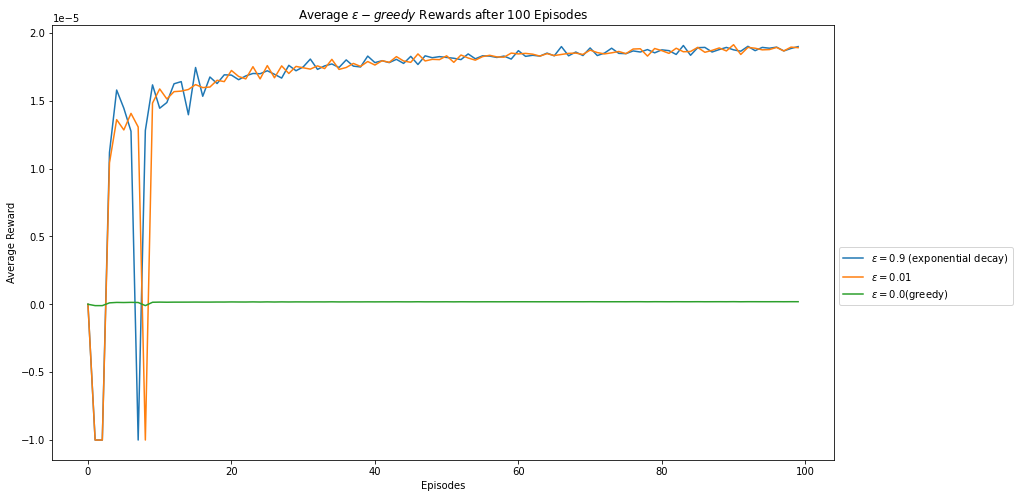

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(average_reward, label="$\epsilon=$"+str(exploration_proba)+" (exponential decay)")
plt.plot(average_reward2, label="$\epsilon=$"+str(exploration_proba2))
plt.plot(average_reward3, label="$\epsilon=$"+str(exploration_proba3)+"(greedy)")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(n_episodes) + " Episodes")
plt.show()

# Evaluation of Gamma

In [8]:
# For testing Gamma or the discount rate I fix the epsilon at 0.1 and learning rate (alpha) at 0.1
# I also do not use decay of epsilon

# GAMMA = 0

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initial the exploration probability (epsilon)
exploration_proba = 0.1

# # store the working probability in another variable
# exploration_proba_temp = exploration_proba

# # Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# exploration_decreasing_decay = 0.9

# # Minimum of exploration prob
# min_exploration_proba = 0.001

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 0

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):

    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state
    
    average_reward[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward = average_reward/n_episodes
print("average reward:",average_reward)

Episode 1: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 2: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 5: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 6: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 7: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 8: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 9: Exploration rate (eps

In [9]:
# copy of the code for different gamma value
# GAMMA = 0.5
states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability (epsilon)
exploration_proba2 = 0.1

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# currently not implemented
# exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.000

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma2 = 0.5

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward2 = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba2*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward2[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba2:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma2 * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward2[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward2[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward2 = average_reward2/n_episodes
print("average reward:",average_reward2)

Episode 1: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6659999999999997
 Average reward: 0.0013319999999999994
Episode 2: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 5: Exploration rate (epsilon): 10.0%
 Total rewards: 0.5199999999999996
 Average reward: 0.001039999999999999
Episode 6: Exploration rate (epsilon): 10.0%
 Total rewards: 0.5519999999999996
 Average reward: 0.0011039999999999993
Episode 7: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 8: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6409999999999998
 Average reward: 0.0012819999999999995
Episode 9: Exploration rate (epsilon): 10

In [10]:
# copy of the code for different gamma value
# GAMMA = 1

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability (epsilon)
exploration_proba3 = 0.1

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# currently not implemented
# exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.000

# Learning rate / step size (alpha)
lr = 0.1

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma3 = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward3 = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba3*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward3[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba3:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))
        
        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        # Updated the equation from practical to remove the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma3 * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward3[e] = total_episode_reward/max_iter_episode

    #Show the total episode reward        
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward3[e])
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward3 = average_reward2/n_episodes
print("average reward:",average_reward3)

Episode 1: Exploration rate (epsilon): 10.0%
 Total rewards: 0.5139999999999996
 Average reward: 0.0010279999999999992
Episode 2: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 3: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
Episode 4: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6129999999999998
 Average reward: 0.0012259999999999994
Episode 5: Exploration rate (epsilon): 10.0%
 Total rewards: 0.7159999999999997
 Average reward: 0.0014319999999999995
Episode 6: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6259999999999997
 Average reward: 0.0012519999999999994
Episode 7: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6849999999999998
 Average reward: 0.0013699999999999997
Episode 8: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6409999999999998
 Average reward: 0.0012819999999999995
Episode 9: Exploration rate (epsilon): 10.0%

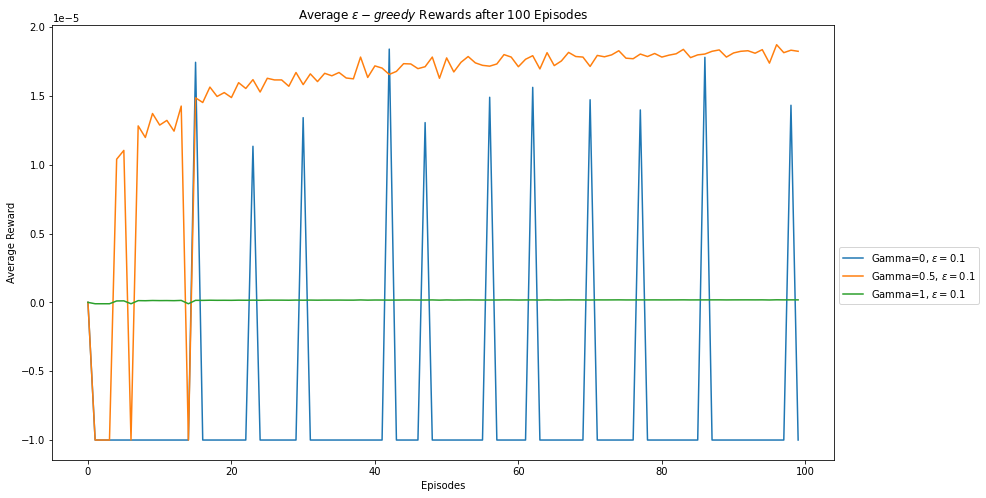

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(average_reward, label="Gamma="+str(gamma)+", $\epsilon=$"+str(exploration_proba))
plt.plot(average_reward2, label="Gamma="+str(gamma2)+", $\epsilon=$"+str(exploration_proba2))
plt.plot(average_reward3, label="Gamma="+str(gamma3)+", $\epsilon=$"+str(exploration_proba3))
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(n_episodes) + " Episodes")
plt.show()

# Evaluation of Optimistic vs Realistic

In [12]:
# For the optimistic vs realistic evaluation I fixed the learning rate at 0.1
# and gamma at 1

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 5
Q_table = np.zeros((len(states_dic),n_actions))
Q_table = Q_table+5

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initial the exploration probability (epsilon)
exploration_proba = 0

# Learning rate / step size (alpha)
lr = 0.1

# learning rate decay - removed
# lrd = 0.05

# learning rate minimum
# lrm = 0

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward = np.zeros(n_episodes)

# track optimal actions
optimal_actions = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):

    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    # Sum for the optimal actions
    num_optimal = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]
        
        # calculate the % of the time optimal action is taken by comparing the
        # Q value of the action taken vs the maximum from the Q table
        # so if the Q value of the action taken is greater than or equal to the 
        # Q value from the existing Q-table it is optimal
        if (1-lr) * Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:])) >= max(Q_table[current_Q_table_coordinates,:]):
          num_optimal+=1

        # Updated the equation to add back learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = (1-lr) * Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

       

        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward[e] = total_episode_reward/max_iter_episode

    optimal_actions[e] = num_optimal/max_iter_episode

    # learning rate decay - removed
    # lr = max(lrm, lr-lrd)

    #Show the reward and optimal action %
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward[e])
    print(" Optimal Action: "+str(optimal_actions[e]*100)+"%")
    print(" Learning Rate: ",lr)
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward = average_reward/n_episodes
print("average reward:",average_reward)

Episode 1: Exploration rate (epsilon): 0%
 Total rewards: 0.6279999999999997
 Average reward: 0.0012559999999999993
 Optimal Action: 0.2%
 Learning Rate:  0.1
Episode 2: Exploration rate (epsilon): 0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
 Optimal Action: 0.0%
 Learning Rate:  0.1
Episode 3: Exploration rate (epsilon): 0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
 Optimal Action: 0.0%
 Learning Rate:  0.1
Episode 4: Exploration rate (epsilon): 0%
 Total rewards: 0.6359999999999997
 Average reward: 0.0012719999999999993
 Optimal Action: 0.4%
 Learning Rate:  0.1
Episode 5: Exploration rate (epsilon): 0%
 Total rewards: 0.6299999999999997
 Average reward: 0.0012599999999999994
 Optimal Action: 0.6%
 Learning Rate:  0.1
Episode 6: Exploration rate (epsilon): 0%
 Total rewards: 0.6869999999999998
 Average reward: 0.0013739999999999996
 Optimal Action: 0.8%
 Learning Rate:  0.1
Episode 7: Exploration rate (epsilon): 0%


In [13]:
# copy of the code for realistic model
current_state = env.reset()

states_dic = {} #dictionary to keep the states/coordinates of the Q table
count = 0
for i in range(10):
    for j in range(10):
        states_dic[i, j] = count
        count+=1
        
n_actions = env.action_space.n

# Initialize the Q-table to 0
Q_table = np.zeros((len(states_dic),n_actions))

# Number of episode we will run
n_episodes = 100

# Maximum of iteration per episode
max_iter_episode = 500

# Initialize the exploration probability (epsilon)
exploration_proba2 = 0.1

# Exploartion decreasing decay for exponential decreasing (exponential epsilon decay)
# currently not implemented
# exploration_decreasing_decay = 0.9

# Minimum of exploration prob
min_exploration_proba = 0.000

# Learning rate / step size (alpha)
lr = 0.1

# learning rate decay - No longer implemented
# lrd = 0.05

# learning rate minimum
# lrm = 0

# discount factor (gamma) - 0 = greedy, 1 = prioritise value
gamma = 1

# track total reward per episode
rewards_per_episode = list()

# track average reward across episodes
average_reward2 = np.zeros(n_episodes)

# track optimal actions
optimal_actions2 = np.zeros(n_episodes)

# Iterate over episodes
for e in range(n_episodes):
    
    # We are not done yet
    done = False
    
    # Sum the rewards that the agent gets from the environment
    total_episode_reward = 0

    # Sum for the optimal actions
    num_optimal2 = 0
    
    # print current exploration rate
    print("Episode "+str(e+1)+": Exploration rate (epsilon): "+str(round(exploration_proba2*100,3))+"%")

    for i in range(max_iter_episode): 
        average_reward2[0] = 0
        env.unwrapped.render()
        vid.capture_frame()
        current_coordinate_x = int(current_state[0])
        current_coordinate_y = int(current_state[1])
        current_Q_table_coordinates = states_dic[current_coordinate_x, current_coordinate_y]

        # generate a random number. if less than epsilon then EXPLORE
        if np.random.uniform(0,1) < exploration_proba2:
          action = env.action_space.sample()
        # if greater than epsilon EXPLOIT
        else:
          action = int(np.argmax(Q_table[current_Q_table_coordinates]))

        # perform action
        next_state, reward, done, _ = env.step(action)

        next_coordinate_x = int(next_state[0]) #get coordinates to be used in dictionary
        next_coordinate_y = int(next_state[1]) #get coordinates to be used in dictionary


        # Update our Q-table using the Q-learning iteration
        next_Q_table_coordinates = states_dic[next_coordinate_x, next_coordinate_y]

        # calculate the % of the time optimal action is taken by comparing the
        # Q value of the action taken vs the maximum from the Q table
        # so if the Q value of the action taken is greater than or equal to the 
        # Q value from the existing Q-table it is optimal
        if (1-lr) * Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:])) >= max(Q_table[current_Q_table_coordinates,:]):
          num_optimal2+=1

        # Updated the equation from practical to add back the learning rate from first part and include discount factor (gamma) in second part
        Q_table[current_Q_table_coordinates, action] = (1-lr)*Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:]))
    
        total_episode_reward = total_episode_reward + reward

        # code for debugging
        # print("Updated Q value:",(1-lr) * Q_table[current_Q_table_coordinates, action] +lr*(reward + gamma * max(Q_table[next_Q_table_coordinates,:])))
        # print("Max Q value in current table:", max(Q_table[current_Q_table_coordinates]))
        
        # If the episode is finished, we leave the for loop        
        if done:
            break
        current_state = next_state

    average_reward2[e] = total_episode_reward/max_iter_episode

    optimal_actions2[e] = num_optimal2/max_iter_episode

    # learning rate decay - not implemented
    # lr = max(lrm, lr-lrd)

    #Show some metrics
    print(" Total rewards:", total_episode_reward)
    print(" Average reward:", average_reward2[e])
    print(" Optimal Action: "+str(optimal_actions2[e]*100)+"%")
    print(" Learning Rate: ",lr)
    
    #Reset enviroment for next episode
    current_state = env.reset()
    
    rewards_per_episode.append(total_episode_reward)

average_reward2 = average_reward2/n_episodes
print("average reward:",average_reward2)

Episode 1: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
 Optimal Action: 0.0%
 Learning Rate:  0.1
Episode 2: Exploration rate (epsilon): 10.0%
 Total rewards: -0.5000000000000003
 Average reward: -0.0010000000000000007
 Optimal Action: 0.0%
 Learning Rate:  0.1
Episode 3: Exploration rate (epsilon): 10.0%
 Total rewards: 0.5639999999999996
 Average reward: 0.0011279999999999992
 Optimal Action: 0.2%
 Learning Rate:  0.1
Episode 4: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6369999999999998
 Average reward: 0.0012739999999999995
 Optimal Action: 0.4%
 Learning Rate:  0.1
Episode 5: Exploration rate (epsilon): 10.0%
 Total rewards: 0.5859999999999996
 Average reward: 0.0011719999999999992
 Optimal Action: 0.6%
 Learning Rate:  0.1
Episode 6: Exploration rate (epsilon): 10.0%
 Total rewards: 0.6529999999999998
 Average reward: 0.0013059999999999997
 Optimal Action: 0.8%
 Learning Rate:  0.1
Episode 7: Exploration r

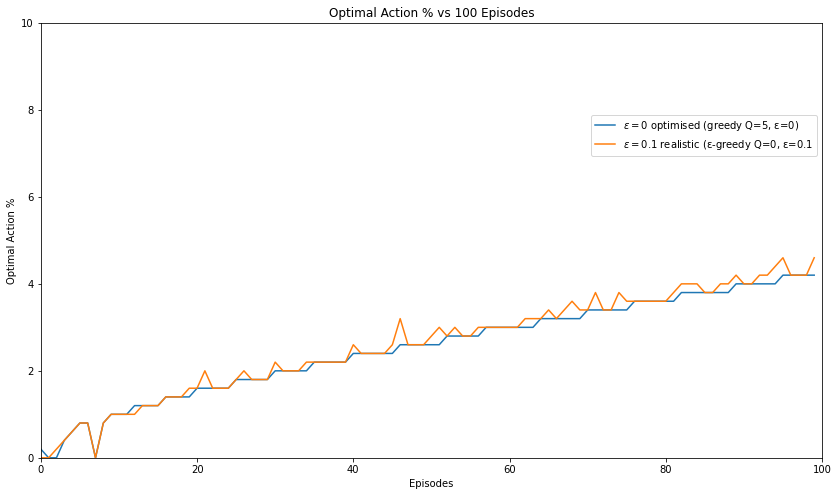

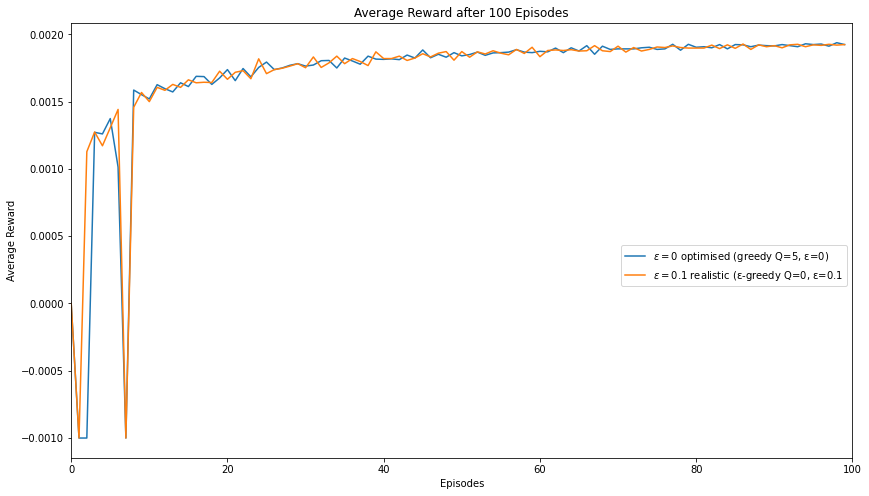

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(optimal_actions*100, label="$\epsilon=$"+str(exploration_proba)+" optimised (greedy Q=5, ε=0)")
plt.plot(optimal_actions2*100, label="$\epsilon=$"+str(exploration_proba2)+" realistic (ε-greedy Q=0, ε=0.1")
plt.legend(bbox_to_anchor=(1, 0.8))
plt.xlabel("Episodes")
plt.ylabel("Optimal Action %")
plt.ylim([0,10])
plt.xlim([0,n_episodes])
plt.title("Optimal Action % vs " + str(n_episodes) + " Episodes")
plt.show()

plt.figure(figsize=(14,8))
plt.plot(average_reward*100, label="$\epsilon=$"+str(exploration_proba)+" optimised (greedy Q=5, ε=0)")
plt.plot(average_reward2*100, label="$\epsilon=$"+str(exploration_proba2)+" realistic (ε-greedy Q=0, ε=0.1")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.xlim([0,n_episodes])
plt.title("Average Reward after " + str(n_episodes) + " Episodes")
plt.show()